In [179]:
import numpy as np
import os
from skimage.measure import block_reduce
from scipy.misc import imread
import cPickle as pkl
import scipy.signal
import numpy.fft as fft
import sys
import optparse
from libtiff import TIFF
from PIL import Image
import re
import itertools
from scipy import ndimage
import pandas as pd
import matplotlib.pyplot as plt

import math
%matplotlib inline

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [260]:
# outdir = '/media/juliana/MAC/data/JR009/20150625b/20150625_JR009_500um_0080Hz/structs'
# outdir = '/media/juliana/MAC/data/JR009/20150625_block2/20150625_JR009_500um_0080Hz_blueLED/structs'
# outdir = '/media/juliana/MAC/data/JR009/20150625_block2/20150625_JR009_500um_0080Hz_red2/structs'
# outdir = '/media/nas/volume1/widefield/data/JR009/20150625_block2/20150625_JR009_500um_0080Hz_blueLED/structs'
# outdir = '/media/nas/volume1/widefield/data/JR009/20150625_block2/20150625_JR009_500um_0080Hz_red2/structs'
outdir = '/media/nas/volume1/widefield/data/CE004/20160203/anesthetized_bar_0008/structs'


In [261]:
rundir = os.path.split(outdir)[0]
sessiondir = os.path.split(rundir)[0]
reduceit=0

/media/nas/volume1/widefield/data/CE004/20160203/anesthetized_bar_0008
['surface_20160203.tif']
.tif


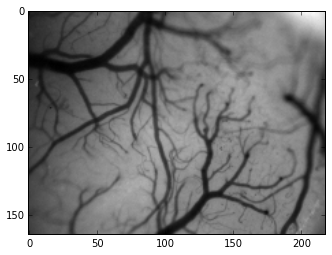

In [262]:
#################################################################################
# GET BLOOD VESSEL IMAGE:
#################################################################################
folders = os.listdir(rundir)
figpath = [f for f in folders if f == 'figures']
print rundir

if figpath:
    figdir = figpath[0]
    tmp_ims = os.listdir(os.path.join(sessiondir, figdir))
    surface_words = ['surface', 'GREEN', 'green', 'Surface']
    ims = [i for i in tmp_ims if any([word in i for word in surface_words])]
    print ims
    impath = os.path.join(sessiondir, figdir, ims[0])
    # image = Image.open(impath) #.convert('L')
    # imarray = np.asarray(image)
    print os.path.splitext(impath)[1]
    if os.path.splitext(impath)[1] == '.tif':
        tiff = TIFF.open(impath, mode='r')
        surface = tiff.read_image().astype('float')
        tiff.close()
        plt.imshow(surface)
    else:
        image = Image.open(impath) #.convert('L')
        surface = np.asarray(image)


else: # NO BLOOD VESSEL IMAGE...
    surface = np.zeros([200,300])

if reduceit:
    surface = block_reduce(surface, reduce_factor, func=np.mean)

plt.imshow(surface, cmap='gray')

In [263]:

files = os.listdir(outdir)
files = [f for f in files if os.path.splitext(f)[1] == '.pkl']
# dstructs = [f for f in files if 'D_target_FFT' in f and str(reduce_factor) in f]
# if not dstructs:
#     dstructs = [f for f in files if 'D_' in f and str(reduce_factor) in f] # address older analysis formats

# MEAN-SUBTRACTED ANALYSIS:
# append = 'nas'
dstructs = [f for f in files if 'Target_fft_' in f]
# dstructs = [d for d in dstructs if append in d]
print dstructs
D = dict()
for f in dstructs:
    outfile = os.path.join(outdir, f)
    with open(outfile,'rb') as fp:
        D[f] = pkl.load(fp)


['Target_fft_V-Left_1_(1, 1)_nas.pkl', 'Target_fft_V-Right_1_(1, 1)_nas.pkl', 'Target_fft_H-Up_1_(1, 1)_nas.pkl', 'Target_fft_V-Left_2_(1, 1)_nas.pkl', 'Target_fft_H-Up_3_(1, 1)_nas.pkl', 'Target_fft_V-Right_3_(1, 1)_nas.pkl', 'Target_fft_V-Left_3_(1, 1)_nas.pkl', 'Target_fft_H-Up_0_(1, 1)_nas.pkl', 'Target_fft_H-Down_1_(1, 1)_nas.pkl', 'Target_fft_H-Down_3_(1, 1)_nas.pkl']


In [264]:
# upkey = [k for k in D.keys() if 'H' in k and '_'+'00' in k and 'Up' in k and '00' in k][0]
# upkey = [k for k in D.keys() if 'H' in k and '_'+run_num+'_' in k and 'Up' in k][0]

# downkey = [k for k in D.keys() if 'H' in k and '_'+run_num in k and 'Down' in k][0]

# leftkey = [k for k in D.keys() if 'V' in k and '_'+run_num in k and 'Left' in k][0]
# rightkey = [k for k in D.keys() if 'V' in k and '_'+run_num in k and 'Right' in k][0]


# upkey = [k for k in D.keys() if 'Up' in k and '_'+run_num in k][0]
# downkey = [k for k in D.keys() if 'Down' in k and '_'+run_num in k][0]

bottomkeys = [k for k in D.keys() if 'Bottom' in k or 'Up' in k] #[0]
topkeys= [k for k in D.keys() if 'Top' in k or 'Down' in k] #[0]

leftkeys = [k for k in D.keys() if 'Left' in k] #[0]
rightkeys = [k for k in D.keys() if 'Right' in k] #[0]

el_keys = [topkeys, bottomkeys]

az_keys = [leftkeys, rightkeys]

print "AZ keys: ", az_keys
print "EL keys: ", el_keys

# curr_keys = [leftkey, rightkey, topkey, bottomkey]


AZ keys:  [['Target_fft_V-Left_3_(1, 1)_nas.pkl', 'Target_fft_V-Left_2_(1, 1)_nas.pkl', 'Target_fft_V-Left_1_(1, 1)_nas.pkl'], ['Target_fft_V-Right_1_(1, 1)_nas.pkl', 'Target_fft_V-Right_3_(1, 1)_nas.pkl']]
EL keys:  [['Target_fft_H-Down_3_(1, 1)_nas.pkl', 'Target_fft_H-Down_1_(1, 1)_nas.pkl'], ['Target_fft_H-Up_0_(1, 1)_nas.pkl', 'Target_fft_H-Up_3_(1, 1)_nas.pkl', 'Target_fft_H-Up_1_(1, 1)_nas.pkl']]


Curr key is:  Target_fft_V-Left_3_(1, 1)_nas.pkl
Showing:  Target_fft_V-Left_3_(1, 1)_nas.pkl


(-0.5, 479.5, 299.5, -0.5)

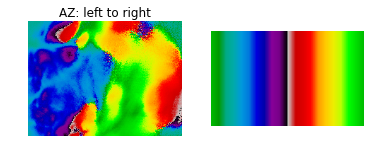

In [267]:
######################################################################
# V-LEFT:
######################################################################

run_num = 3
reduce_factor = (1, 1) #(2, 2)
append = 'nas' #'filter' #'nas'
cond_type = 'Left'

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]

tmp_keys = [k for k in leftkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print leftkeys
else:
    leftkey = tmp_keys[0]
    print "Curr key is: ", leftkey

leftmap = D[leftkey]['ft']

currkey = leftkey
currmap = leftmap

print "Showing: ", currkey
fig = plt.figure()

fig.add_subplot(1,2,1)
plt.imshow(np.angle(currmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('AZ: left to right')
plt.axis('off')

ax = fig.add_subplot(1,2,2)
plt.imshow(V_left_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.axis('off')

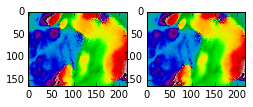

In [268]:
phasemap = np.angle(leftmap)
plt.imshow(phasemap, cmap='spectral')

old_min = phasemap.min()
old_max = phasemap.max()
new_min = 0
new_max = 1

normed_phasemap = np.zeros(phasemap.shape)
for x in range(phasemap.shape[0]):
    for y in range(phasemap.shape[1]):
        old_val = phasemap[x, y]
        normed_phasemap[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

# normed_phasemap = 

im = Image.fromarray(np.uint8(plt.cm.spectral(normed_phasemap)*255))

plt.subplot(1,3,1)
plt.imshow(phasemap, cmap='spectral')
plt.colorbar

plt.subplot(1,3,2)
plt.imshow(normed_phasemap, cmap='spectral')
imname = os.path.join(os.path.split(outdir)[0], 'V-Left_0_im.jpg')
im.save(imname)
# plt.subplot(1,3,3)
# plt.colorbar()


<matplotlib.colorbar.Colorbar instance at 0x7febe269a368>

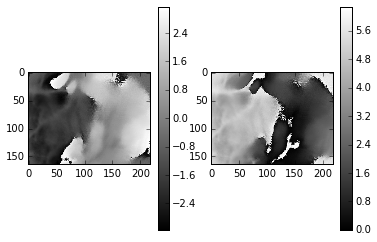

In [269]:
import math
phase_left = np.angle(leftmap)
# phase_right = np.angle(rightmap)

for x in range(phase_left.shape[0]):
    for y in range(phase_left.shape[1]):
        if phase_left[x,y] < 0:
            phase_left[x,y] += 2*math.pi

# for x in range(phase_right.shape[0]):
#     for y in range(phase_right.shape[1]):
#         if phase_right[x,y] < 0:
#             phase_right[x,y] += 2*math.pi

plt.subplot(1,2,1)
plt.imshow(np.angle(leftmap), cmap='gray')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(phase_left, cmap='gray')
plt.colorbar()

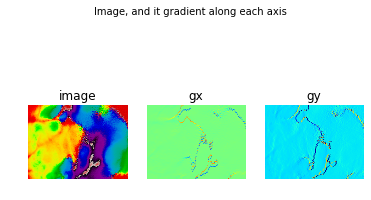

In [270]:
# compute gradient of image
I = Image.open(imname)

p = phase_left

# plt.imshow(p)
gx, gy = np.gradient(p)
# print "gx =", gx
# print "gy =", gy

# plotting
plt.close("all")
plt.figure()
plt.suptitle("Image, and it gradient along each axis")
ax = plt.subplot("131")
ax.axis("off")
ax.imshow(p, cmap='spectral')
ax.set_title("image")

ax = plt.subplot("132")
ax.axis("off")
ax.imshow(gx)
ax.set_title("gx")

ax = plt.subplot("133")
ax.axis("off")
ax.imshow(gy)
ax.set_title("gy")
plt.show()


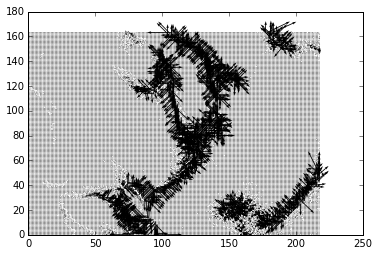

In [271]:
from pylab import *
Q = quiver(gx, gy)

# l,r,b,t = axis()
# dx, dy = r-l, t-b
# axis([l-0.05*dx, r+0.05*dx, b-0.05*dy, t+0.05*dy])

Curr key is:  Target_fft_V-Right_3_(1, 1)_nas.pkl
Showing:  Target_fft_V-Right_3_(1, 1)_nas.pkl


(-0.5, 479.5, 299.5, -0.5)

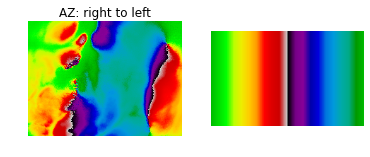

In [272]:
######################################################################
# V-RIGHT:
######################################################################

# run_num = 0 #3
# reduce_factor = (2, 2) #(1, 1)
# append = 'filter' #'nas'
# cond_type = 'Right'

run_num = 3
reduce_factor = (1, 1) #(2, 2)
append = 'nas' #'filter' #'nas'
cond_type = 'Right'

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]
tmp_keys = [k for k in rightkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print rightkeys
else:
    rightkey = tmp_keys[0]
    print "Curr key is: ", rightkey

rightmap = D[rightkey]['ft']

currkey = rightkey
currmap = rightmap

print "Showing: ", currkey
fig = plt.figure()

fig.add_subplot(1,2,1)
plt.imshow(np.angle(currmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('AZ: right to left')

ax = fig.add_subplot(1,2,2)
plt.imshow(V_right_legend, cmap='spectral')
plt.axis('off')


Curr key is:  Target_fft_H-Down_0_(2, 2)_filter.pkl
Showing:  Target_fft_H-Down_0_(2, 2)_filter.pkl


(-0.5, 479.5, 299.5, -0.5)

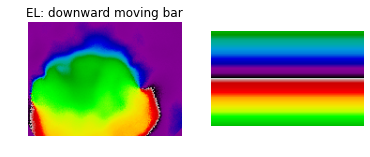

In [251]:
######################################################################
# H-TOP: DOWNward moving bar
######################################################################

run_num = 0 #3
reduce_factor = (2, 2) #(1, 1)
append = 'filter' #'nas'
cond_type = 'Down'
# cond_type = 'Top'

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]
tmp_keys = [k for k in topkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print topkeys
else:
    topkey = tmp_keys[0]
    print "Curr key is: ", topkey

topmap = D[topkey]['ft']

currkey = topkey
currmap = topmap

print "Showing: ", currkey
fig = plt.figure()

fig.add_subplot(1,2,1)
plt.imshow(np.angle(currmap), cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('EL: downward moving bar')

ax = fig.add_subplot(1,2,2)
plt.imshow(H_down_legend, cmap='spectral')
plt.axis('off')


Curr key is:  Target_fft_H-Up_0_(2, 2)_filter.pkl
Showing:  Target_fft_H-Up_0_(2, 2)_filter.pkl


(-0.5, 479.5, 299.5, -0.5)

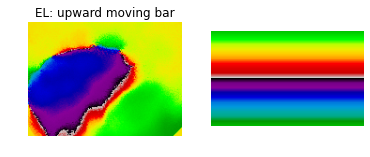

In [252]:
######################################################################
# H-BOTTOM :  UPward moving bar 
######################################################################

run_num = 0 #3
reduce_factor = (2, 2) #(1, 1)
append = 'filter' #'nas'
cond_type = 'Up'
# cond_type = 'Bottom'

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]
tmp_keys = [k for k in bottomkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print bottomkeys
else:
    bottomkey = tmp_keys[0]
    print "Curr key is: ", bottomkey

bottommap = D[bottomkey]['ft']

currkey = bottomkey
currmap = bottommap

print "Showing: ", currkey
fig = plt.figure()

fig.add_subplot(1,2,1)
plt.imshow(np.angle(currmap), cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.title('EL: upward moving bar')
plt.axis('off')

ax = fig.add_subplot(1,2,2)
plt.imshow(H_up_legend, cmap='spectral')
plt.axis('off')

-3.0474204577856483

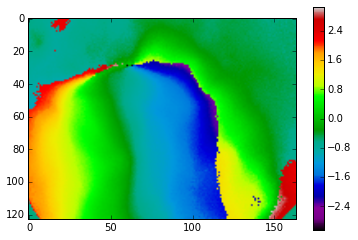

In [253]:
######################################################################
# ABSOLUTE AZIMUTH -- SHIFT NEGATIVE VALS
######################################################################

phase_left = np.angle(leftmap)
phase_right = np.angle(rightmap)

for x in range(phase_left.shape[0]):
    for y in range(phase_left.shape[1]):
        if phase_left[x,y] < 0:
            phase_left[x,y] += 2*math.pi

for x in range(phase_right.shape[0]):
    for y in range(phase_right.shape[1]):
        if phase_right[x,y] < 0:
            phase_right[x,y] += 2*math.pi


az = (phase_left - phase_right) / 2.
plt.imshow(az, cmap='spectral') #, vmin=0, vmax=2*math.pi)
plt.colorbar()

az.min()

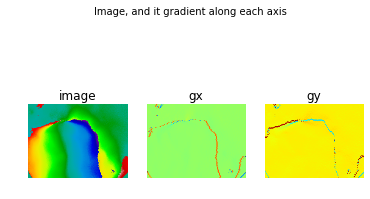

In [254]:
# GRADIENT?

# SHIFT the combined ELEVATION map, too (for gradient calc)

shift_az = (phase_left - phase_right) / 2.
for x in range(shift_az.shape[0]):
    for y in range(shift_az.shape[1]):
        if shift_az[x, y] < 0:
            shift_az[x, y] += 2*math.pi
            
p = az #shift_az
# plt.imshow(p)
gy, gx = np.gradient(p)
# print "gx =", gx
# print "gy =", gy

# plotting
plt.close("all")
plt.figure()
plt.suptitle("Image, and it gradient along each axis")
ax = plt.subplot("131")
ax.axis("off")
ax.imshow(p, cmap='spectral')
ax.set_title("image")

ax = plt.subplot("132")
ax.axis("off")
ax.imshow(gx)
ax.set_title("gx")

ax = plt.subplot("133")
ax.axis("off")
ax.imshow(gy)
ax.set_title("gy")
plt.show()

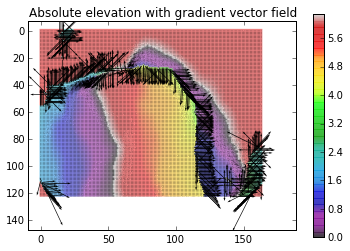

In [255]:
from pylab import *


Q = quiver(gx, gy)

l,r,b,t = axis()
dx, dy = r-l, t-b
axis([l-0.05*dx, r+0.05*dx, b-0.05*dy, t+0.05*dy])

plt.imshow(shift_az, cmap='spectral', alpha=0.5)

plt.gca().invert_yaxis()

plt.colorbar()
plt.title('Absolute elevation with gradient vector field')

-3.0474204577856483

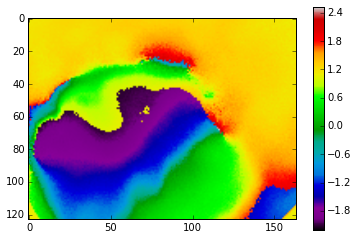

In [257]:
######################################################################
# ABSOLUTE ELEVATION -- SHIFT NEGATIVE VALS
######################################################################

phase_top = np.angle(topmap)
phase_bottom = np.angle(bottommap)

for x in range(phase_top.shape[0]):
    for y in range(phase_top.shape[1]):
        if phase_top[x,y] < 0:
            phase_top[x,y] += 2*math.pi

for x in range(phase_bottom.shape[0]):
    for y in range(phase_bottom.shape[1]):
        if phase_bottom[x,y] < 0:
            phase_bottom[x,y] += 2*math.pi

        
# plt.imshow(phase_left, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
# phase_left

# plt.subplot(1,2,2)
# plt.imshow(phase_right, cmap='spectral')
# plt.colorbar()
        
el = (phase_top - phase_bottom) / 2.
# plt.imshow(az, cmap='spectral') #, vmin=-1*math.pi, vmax=1*math.pi)
plt.imshow(el, cmap='spectral') #, vmin=0, vmax=2*math.pi)
plt.colorbar()
# plt.colorbar()
# x = np.where(phase_left<0)
# len(x[1])
# phase_left.max()
az.min()

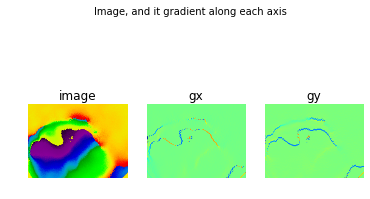

In [258]:
# GRADIENT?

shift_el = (phase_top - phase_bottom) / 2.
for x in range(shift_el.shape[0]):
    for y in range(shift_el.shape[1]):
        if shift_el[x, y] < 0:
            shift_el[x, y] += 2*math.pi
            
p = el #shift_el
# plt.imshow(p)
gy, gx = np.gradient(p)
# print "gx =", gx
# print "gy =", gy

# plotting
plt.close("all")
plt.figure()
plt.suptitle("Image, and it gradient along each axis")
ax = plt.subplot("131")
ax.axis("off")
ax.imshow(p, cmap='spectral')
ax.set_title("image")

ax = plt.subplot("132")
ax.axis("off")
ax.imshow(gx)
ax.set_title("gx")

ax = plt.subplot("133")
ax.axis("off")
ax.imshow(gy)
ax.set_title("gy")
plt.show()

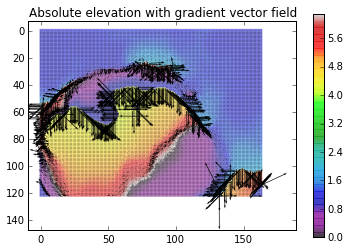

In [259]:
from pylab import *


Q = quiver(gx, gy)

l,r,b,t = axis()
dx, dy = r-l, t-b
axis([l-0.05*dx, r+0.05*dx, b-0.05*dy, t+0.05*dy])

plt.imshow(shift_el, cmap='spectral', alpha=0.5)

plt.gca().invert_yaxis()

plt.colorbar()
plt.title('Absolute elevation with gradient vector field')

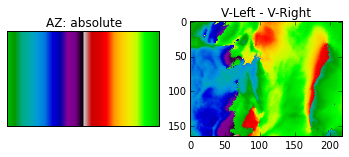

In [214]:
######################################################################
# ABSOLUTE AZIMUTH
######################################################################
# For LEFTMAP - RIGHTMAP, color legend follows LEFT-only map direction:

# phase_left = np.angle(leftmap)
# phase_right = np.angle(rightmap)

# for i in phase_left:
#     if i<0:
#         i += 2*math.pi

azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.
# azimuth_phase = ( np.angle(leftmap / rightmap) ) / 2.

# SEE ABOVE COLORBAR
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(V_left_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('AZ: absolute')
fig.add_subplot(1,2,2)
plt.imshow(azimuth_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('V-Left - V-Right')

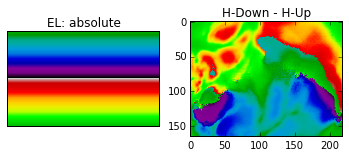

In [215]:
######################################################################
# ABSOLUTE ELEVATION
######################################################################

elevation_phase = ( np.angle(topmap) - np.angle(bottommap) ) / 2.

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(H_down_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('EL: absolute')
fig.add_subplot(1,2,2)
plt.imshow(elevation_phase, cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.title('H-Down - H-Up')

(-0.5, 479.5, 299.5, -0.5)

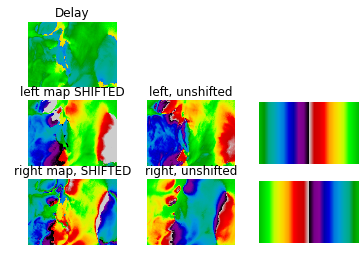

In [219]:
######################################################################
# DELAY VERT:
######################################################################

fig = plt.figure()


colormap = 'spectral'

# 1. Delay map
fig.add_subplot(3,3,1)
# delay_vert = (np.angle(leftmap) + np.angle(rightmap)) / 2.
delay_vert = np.angle(leftmap * rightmap) / 2.
plt.imshow(delay_vert, cmap=colormap,  vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title("Delay")

# 2. blank

# 3. LEFT-map shifted
fig.add_subplot(3,3,4)
# shift_left = np.angle(leftmap.conjugate()) - delay_vert
shift_left = np.angle(leftmap) - delay_vert
plt.imshow(shift_left, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('left map SHIFTED')

# 4. LEFT-map relative
ax = fig.add_subplot(3,3,5)
plt.imshow(np.angle(leftmap), cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('left, unshifted')

# 5.  LEFT-map LEGEND
ax = fig.add_subplot(3,3,6)
plt.imshow(V_left_legend, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')

# 6. RIGHT-map shifted
fig.add_subplot(3,3,7)
# shift_right = np.angle(rightmap) - delay_vert
shift_right = np.angle(rightmap.conjugate()) - delay_vert
plt.imshow(shift_right, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('right map, SHIFTED')

# 7. RIGHT-map relative
ax = fig.add_subplot(3,3,8)
plt.imshow(np.angle(rightmap), cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('right, unshifted')

# 8. RIGHT-map LEGEND
ax = fig.add_subplot(3,3,9)
plt.imshow(V_right_legend, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')

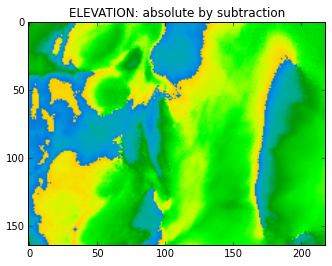

In [217]:
# azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.
azimuth_phase = ( np.angle(leftmap / rightmap) ) / 2.

plt.imshow(azimuth_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute by subtraction')

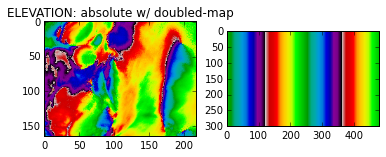

In [218]:
# azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.
fig = plt.figure()
fig.add_subplot(1,2,1)
azimuth_phase = np.angle(leftmap / rightmap) 
# azimuth_phase = np.angle(rightmap / leftmap) 

plt.imshow(azimuth_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute w/ doubled-map')

fig.add_subplot(1,2,2)
plt.imshow(double_left_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)


(-0.5, 479.5, 299.5, -0.5)

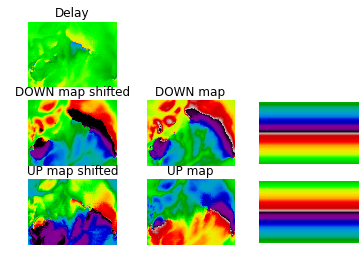

In [220]:
######################################################################
# DELAY HORIZ:
######################################################################

fig = plt.figure()

# 1. Delay map
fig.add_subplot(3,3,1)
delay_horz = np.angle(topmap * bottommap) / 2.
plt.imshow(delay_horz, cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title("Delay")

# 2. blank

# 3. DOWN-map shifted
fig.add_subplot(3,3,4)
# shift_down = np.angle(downmap.conjugate()) - delay_horz
shift_top = np.angle(topmap) - delay_horz
plt.imshow(shift_top, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('DOWN map shifted')

# 4. DOWN-map relative
ax = fig.add_subplot(3,3,5)
plt.imshow(np.angle(topmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('DOWN map')

# 5.  Down-map LEGEND
ax = fig.add_subplot(3,3,6)
plt.imshow(H_down_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')

# 6. UP-map shifted
fig.add_subplot(3,3,7)
shift_bottom = np.angle(bottommap.conjugate()) - delay_horz
# shift_up = delay_horz - np.angle(upmap.conjugate())
plt.imshow(shift_bottom, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('UP map shifted')

# 7. UP-map relative
ax = fig.add_subplot(3,3,8)
plt.imshow(np.angle(bottommap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('UP map')

# 8. UP-map LEGEND
ax = fig.add_subplot(3,3,9)
plt.imshow(H_up_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')

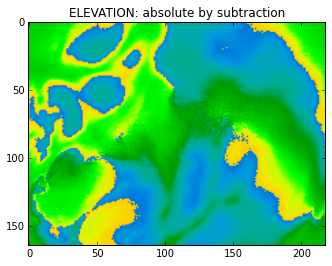

In [221]:
# elevation_phase = ( np.angle(downmap) - np.angle(upmap) ) / 2.
elevation_phase = ( np.angle(topmap / bottommap) ) / 2.

plt.imshow(elevation_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute by subtraction')

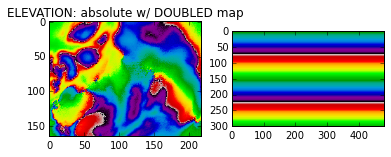

In [222]:
# elevation_phase = ( np.angle(downmap) - np.angle(upmap) ) / 2.
elevation_phase = np.angle(topmap / bottommap)

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(elevation_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute w/ DOUBLED map')

fig.add_subplot(1,2,2)
plt.imshow(double_down_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)

In [223]:
#######################################
# Set THRESHOLD params:
#######################################

thresh = 0.2
log_thresh = 0.8
use_log = 0

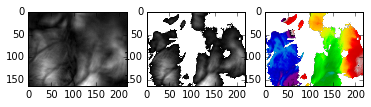

In [224]:

# V-LEFT:
# MASK WITH MAGNITUDE:
# LEFT


curr_key = leftkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

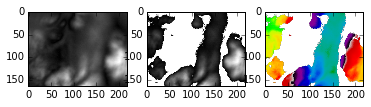

In [225]:
# V-RIGHT:  MASK WITH MAGNITUDE:
# RIGHT 

curr_key = rightkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

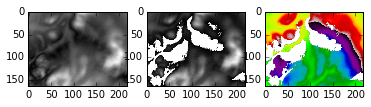

In [226]:
# MASK WITH MAGNITUDE:
# H-DOWN: 

curr_key = topkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

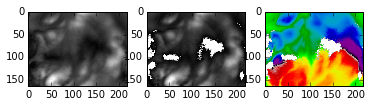

In [227]:
# MASK WITH MAGNITUDE:
# H-UP: 

log_thresh = 0.8
thresh = 0.5
use_log = 1

curr_key = bottomkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)